In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import statsmodels

from matplotlib import rc        # for Mac
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

# 1. Summary 


### 1. ARIMA(Auto-regressive Integrated Moving Average) 

: 시계열 예측(Time-Series Prediction)을 다루는 여러 가지 통계적 기법
   
### 2. 미래의 데이터를 예측 하려면? 

(1) 데이터가 안정적(Stationary)이어야 함 
  
(2) 세 가지 통계치가 일정해야 함 (이동평균, 이동표준편차, 자기공분산) 
  
(3) ADF 검정을 통해 Stationary 여부를 체크

### 3. 자기공분산, 자기상관계수 / 귀무가설, 대립가설, p-value / ADF 검정

  (1) 자기공분산, 자기상관계수

 - 자기공분산(Autocovariance) : 자기공분산이란 일정 시차(h)를 둔 자기 자신과의 공분산
 - 자기상관계수(Autocorrelation) : 자기상관계수란 일정 시차(h)를 둔 자기 자신과의 상관계수
      
  (2) 귀무가설, 대립가설, p-value
    
 - 귀무가설 : 처음부터 버릴 것을 예상하는 가설. 차이가 없거나 의미있는 차이가 없는 경우의 가설
    - ex) 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 귀무 가설은 “전국 남학생의 평균 키는 170cm과 같다.(or
    차이가 없다.)”

 - 대립가설 : 귀무가설이 거짓이라면 대안적으로 참이 되는 가설
    - ex) 전국 남학생의 평균 키가 170cm라는 주장을 통계적으로 검정한다면, 이에 대한 대립 가설은 “전국 남학생의 평균 키는 170cm와 다르다.(or 차이가 있다.)”
          
 - p-value : “귀무가설이 참이라고 가정했을 때, 표본으로 얻어지는 통계치(예: 표본 평균)가 나타날 확률"
    - p값이 낮다는 것은 귀무가설이 참이라는 가정 하에서 표본을 추출했을 때, 이런 표본 평균이 관측될 확률이 낮다는 것을 뜻함          
    - 즉 p 값이 매우 낮으면, 이러한 표본 통계량은 우연히 나타나기 어려운 케이스이기 때문에, 우리는 귀무가설을 채택하지 않고(기각하고) 대립가설을 채택하게 됨
   
  (3) Augmented Dickey-Fuller Test (ADF 검정)
    
 - 귀무가설 : "주어진 시계열 데이터가 안정적이지 않다." → 2) 기각 → 3) 대립가설 : "이 시계열 데이터가 안정적이다."를 채택
 
### 4. from statsmodels.tsa.stattools import adfuller

  (1) statsmodels 패키지 : R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지
  
  (2) adfuller : statsmodels 패키지에서 제공하는 메서드

### 5. 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?

  (1) 보다 Stationary한 시계열로 가공해 가기
  
    - 1) 로그함수 변환 : 변환 후 ADF 검정 수행 → p-value 감소, 시간 추이에 따른 분산이 일정, but 시간 추이에 따라 평균 계속 증가
    - 2) Moving average 제거 - 추세(Trend) 상쇄하기 : ts_log_moving_avg = ts_log - rolling mean(=moving average)
    - 3) ts_log_moving_avg의 정성적, 정략적 분석 : ex) p-value가 0.02 수준. 95% 이상의 confidence로 이 time series는 stationary. 이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하지만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요
    - 4) 차분(Differencing) - 계절성(Seasonality) 상쇄하기    
  (2) 시계열 분해(Time series decomposition) : from statsmodels.tsa.seasonal import seasonal_decompose
  
    - 1) statsmodels 라이브러리 : seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있음 (위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됨)
    - 2) Residual = Original 시계열 - Trend - Seasonality
    - 3) Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줌
### 6. ARIMA 모델의 개념

  (1) ARIMA 모델의 정의 : ARIMA = AR(Autoregressive) + I(Integrated) + MA(Moving Average)
  
  : 앞에서 시계열 데이터가 Trend와 Seasonality, Residual로 분해되는 것을 확인함. 또, Trend와 Seasonality를 잘 분리해 낸 경우 Residual이 예측력 있는 안정적인 시계열 데이터가 되는 것을 확인하였음. ARIMA(Autoregressive Integrated Moving Average)를 사용하면 이 원리를 이용해 시계열 데이터 예측 모델을 자동으로 만들 수 있음
  
    - 1) AR(자기회귀, Autoregressive) : AR은 시계열의 Residual에 해당하는 부분을 모델링한다고 볼 수 있음. 주식 값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점 
    - 2) MA(이동평균, Moving Average) : MA는 시계열의 Trend에 해당하는 부분을 모델링한다고 볼 수 있음. 주식 값이 최근의 증감 패턴을 지속할 것이라고 보는 관점이 MA로 모델링하는 관점
    - 3) I (차분 누적, Integration) : I는 시계열의 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있음   
   → ARIMA는 위 3가지 모델을 모두 한꺼번에 고려함. 주식값을 예측하는 우리의 태도와 비슷한데 어제 주식값이 떨어졌다는 것을 알게 되었을 때, '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와 '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오르게 됨. ARIMA는 두 모델 사이에서 적정 수준을 찾아가는 능력을 보여 줌

  (2) ARIMA 모델의 모수 p, d, q : ARIMA를 효과적으로 활용하기 위해서는 ARIMA의 모수(parameter)를 잘 설정해야 함. 핵심적인 숫자들을 잘 정해야 올바른 예측식을 구할 수 있음
    
    - 1) p : 자기회귀 모형(AR)의 시차
    - 2) d : 차분 누적(I) 횟수
    - 3) q : 이동평균 모형(MA)의 시차     
   - ARIMA의 모수 p, d, q를 선택하는 방법 : ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function). 이 AutoCorrelation은 우리가 맨 첫 스텝에서 다룬 개념 중 하나인 자기상관계수와 같은 것
     
     - ACF(Autocorrelation Function)
        - 시차(lag)에 따른 관측치들 사이의 관련성을 측정하는 함수
        - 주어진 시계열의 현재 값이 과거 값과 어떻게 상관되는지 설명함 
        - ACF plot에서 X축은 상관계수를 나타냄, y축은 시차 수를 나타냄
     
     - PACF(Partial Autocorrelation Function)
        - '다른 관측치의 영향력을 배제'하고 두 시차의 관측치 간 관련성을 측정하는 함수
        - k 이외의 모든 시차를 갖는 관측치가 얼마나 관련이 있는지 나타내는 척도
       
  (3) 학습 데이터 분리 : 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리하기. 분리 비율은 학습과 테스트에 9:1. 시계열 예측이니만큼 가장 나중 데이터를 테스트용으로 사용하는 것이 타당

### 7. ARIMA 모델 훈련과 추론
 - forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측
 - 시계열 데이터를 로그 변환하여 사용했으므로 다시 지수 변환해야 정확한 오차를 계산할 수 있음. np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산

# 2. Project_01_TESLA

## (1) 시계열 데이터 준비

In [2]:
df = pd.read_csv('TSLA.csv', index_col='Date', parse_dates=True)
ts = df['Close']
ts

Date
2021-12-22    336.290009
2021-12-23    355.666656
2021-12-27    364.646667
2021-12-28    362.823334
2021-12-29    362.063324
                 ...    
2022-12-16    150.229996
2022-12-19    149.869995
2022-12-20    137.800003
2022-12-21    137.570007
2022-12-22    125.349998
Name: Close, Length: 253, dtype: float64

## (2) 데이터 전처리

### * inpterpolate : 결측값 보간

- 시계열 데이터의 값에 선형으로 비례하는 방식으로 결측값 보간 : ts.interpolate()

- 시계열 날짜 index를 기준으로 결측값 보간 : ts.interploate(method='time')

- DataFrame 값에 선형으로 비례하는 방식으로 결측값 보간 : df.interpolate(method='values') 
       
[1] https://rfriend.tistory.com/264

#### 1) 결측치 처리

In [3]:
# ts = ts.interpolate(method='time')   # interpolate : 결측값 보간
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력

Series([], Name: Close, dtype: float64)

#### 2) 로그 변환 

In [4]:
ts_log = np.log(ts)
ts_log

Date
2021-12-22    5.817974
2021-12-23    5.873994
2021-12-27    5.898929
2021-12-28    5.893916
2021-12-29    5.891819
                ...   
2022-12-16    5.012167
2022-12-19    5.009768
2022-12-20    4.925803
2022-12-21    4.924133
2022-12-22    4.831110
Name: Close, Length: 253, dtype: float64

## (3) 시계열 안정성 분석

#### 정성적 그래프 분석 → 정량적 ADF Test → 시계열 분해 → Residual 안정성 확인

In [5]:
# 원본시계열, 이동평균, 이동표준편차
def plot_rolling_statistics(timeseries, window=12) :
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열
    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
# Augmented Dickey-Fuller Test (ADF 검정)
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_test(timeseries) :
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출
    dftest = adfuller(timeseries, autolag='AIC')  
    # adfuller 메서드가 리턴한 결과를 정리하여 출력
    print('Results of Augmented Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

#### 1) 정성적 그래프 분석

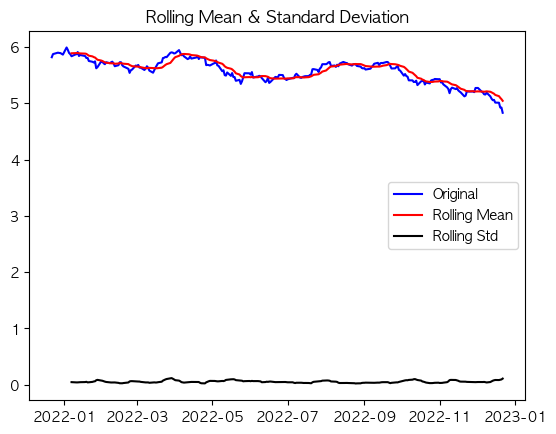

In [6]:
plot_rolling_statistics(ts_log, window=12)

#### 2) 정량적 Augmented Dicky-Fuller Test

In [7]:
augmented_dickey_fuller_test(ts_log)

Results of Augmented Dickey-Fuller Test:
Test Statistic                   0.038136
p-value                          0.961575
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


→ ts_log 시계열이 안정적이지 않다는 귀무가설은 p-value가 0.75에 가깝게 나타남. 따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됨

#### 3) 시계열 분해 (Time Series Decomposition)

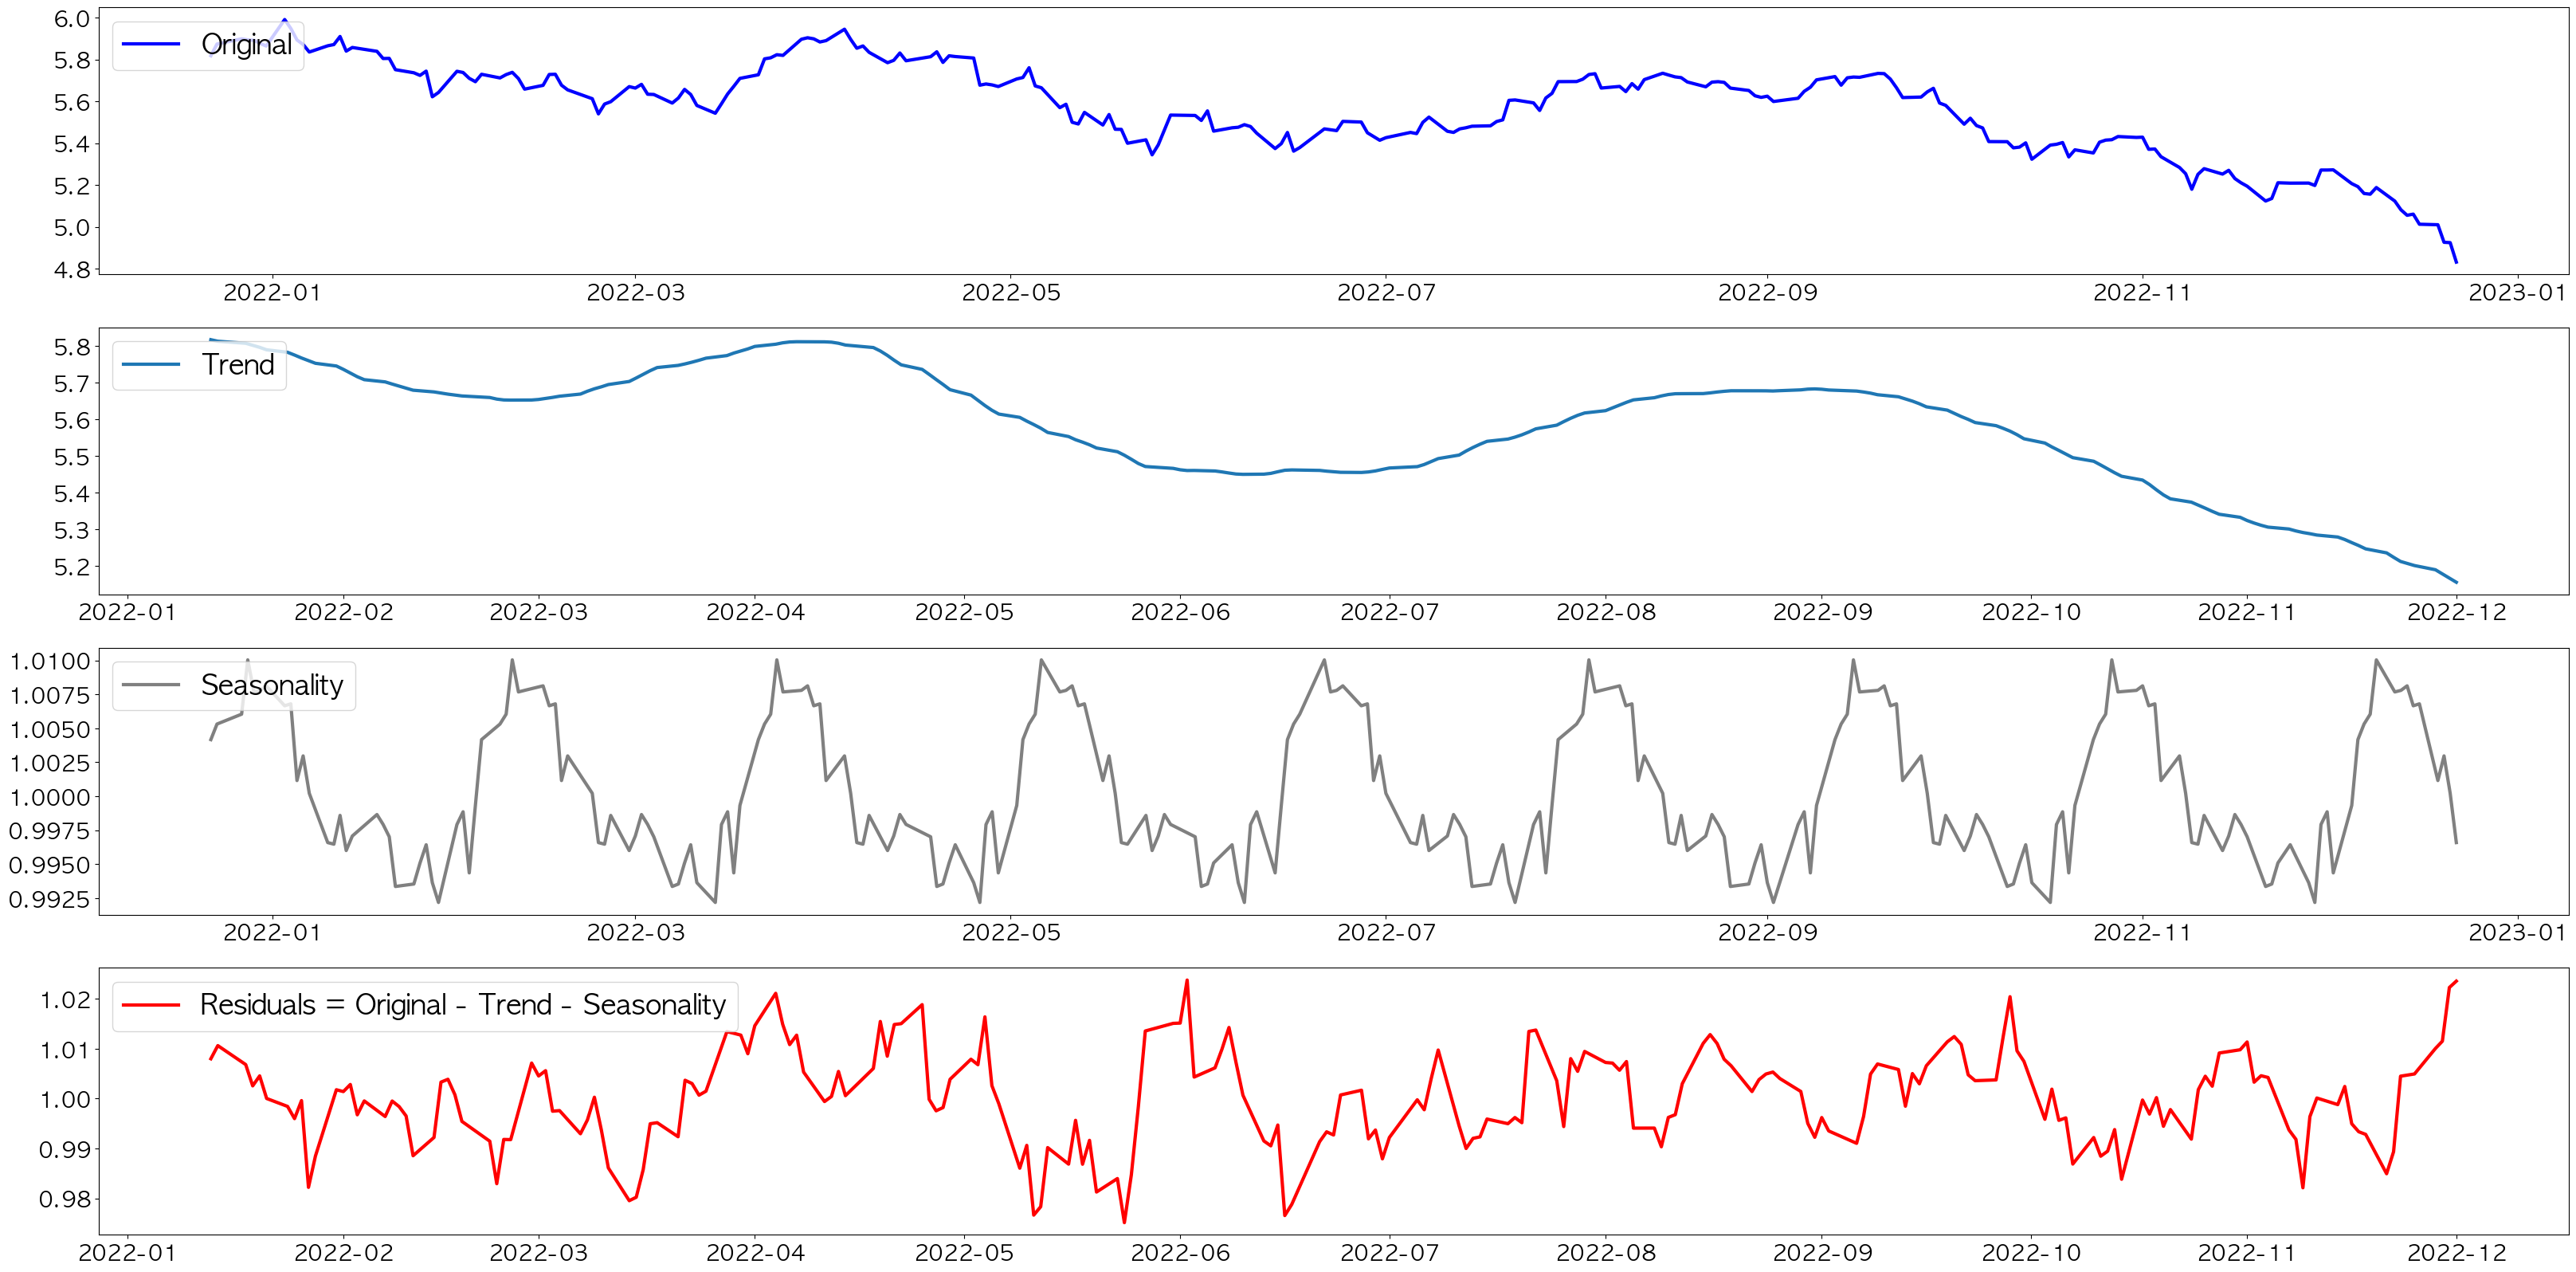

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (40, 20))

plt.subplot(411)
plt.plot(ts_log, label='Original', c='b', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(412)
plt.plot(trend, label='Trend', c='tab:blue', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', c='grey', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(414)
plt.plot(residual, label='Residuals = Original - Trend - Seasonality', c='r', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

#### 4) Residual 안정성 확인

In [9]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -4.961853
p-value                          0.000026
#Lags Used                       9.000000
Number of Observations Used    213.000000
Critical Value (1%)             -3.461429
Critical Value (5%)             -2.875207
Critical Value (10%)            -2.574054
dtype: float64


## (4) 학습, 테스트 데이터셋 생성

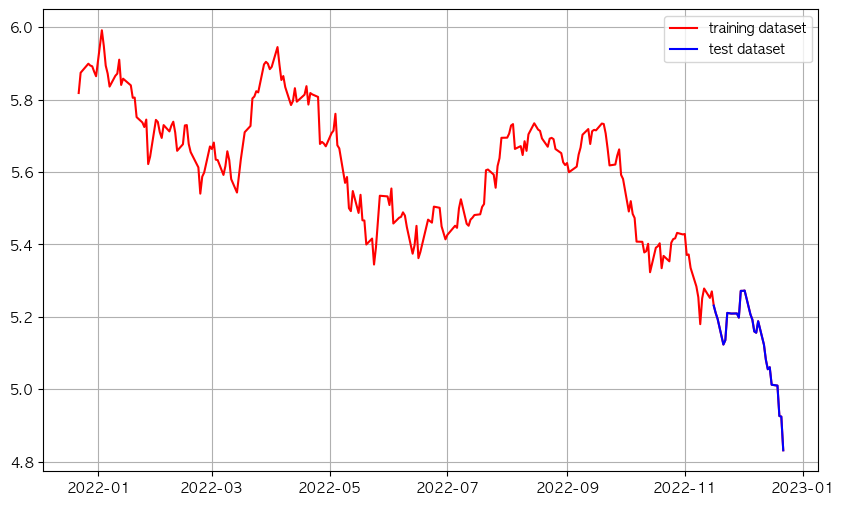

In [10]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()
plt.show()

## (5) 적정 ARIMA 모수 찾기

#### 1) ACF, PACF 그리기 → p, q 구하기

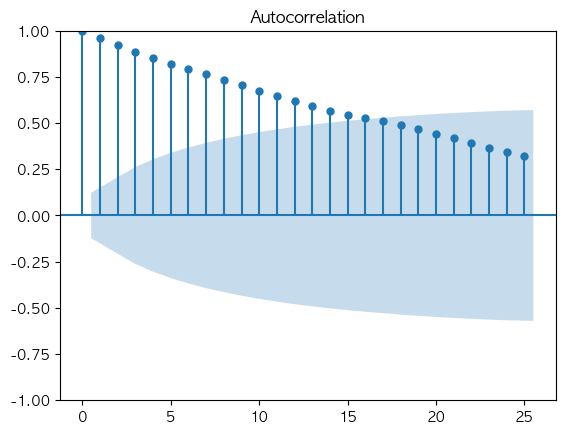

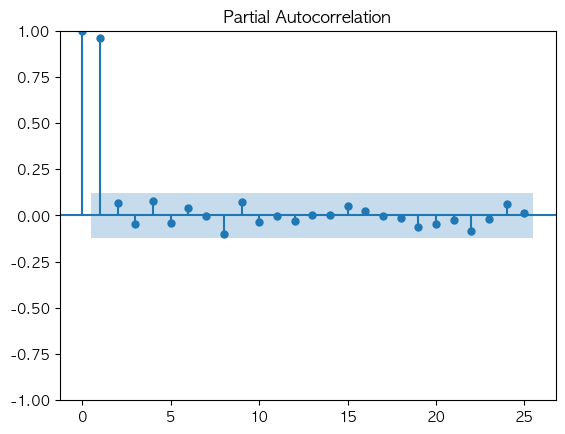

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

#### cf.) ACF, PACF 그래프 해석

그래프를 성공적으로 그렸다면, 이제 그래프를 해석해보자. y축의 값들은 ACF, PACF를 수치화 한 것이고, x축이 lag되는 수, 즉 몇 개 전의 값에 대한 것인지 말해준다. 왼쪽으로부터 첫 번째 바는 x가 0.0인데, 이는 현재 값이라고 생각하면 된다. 그래서 ACF, PACF 값이 무조건 1로 나온다. x값이 2이면 2개 전의 값을 말한다.

우선, 실핀처럼 생긴 bar들이 있는데, 이게 파란색 상자 안에 들어가게 되면, 그때부터는 통계적으로 significant하지 않다고 본다.

아래 표를 활용해서 적합한 모델과 p,q값을 구할 수 있다. 이를 테면, ACF 그래프의 모양이 점점 작아지고, PACF 그래프에서 p개 바 뒤에 그래프가 끊긴다면 (insignificant 해지거나 - 값으로 갑자기 떨어질 경우) AR 모델이 적절한 것이고, p 값을 AR 모델의 파라미터로 쓰면 된다.

    AR(p)모델적합 / MA(q)모델적합 / ARMA(p,q)모델적합
ACF : 점점 작아진다   /  시차 q 이후에 0  /    점점 작아진다

PACF: 시차 p 이후에 0  /  점점 작아진다    /    점점 작아진다

[2] https://happy-chipmunk.tistory.com/96

#### [TESLA ACF, PACF 그래프 해석]

위의 표에 따르면, ACF는 점점 작아지고 있으며 PACF는 시차 p이후에 0이 되므로 AR(p) 모델이 적합하다고 볼 수 있다.

ACF 그래프가 점점 작아지고, PACF 그래프는 첫 값으로부터 1개 뒤 이후부터 파란상자 안에 값이 들어가며 그래프가 끊기는 것을 볼 수 있다. 이것으로 볼 때, p=1이 적합한 것 같다. p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문이다. PACF가 0이라는 의미는 현재 데이터와 p시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻이다. 따라서 이 데이터 셋을 사용할 때는 AR(1) 모델을 활용하는 것이 가장 정확도가 높을 것이라고 유추할 수 있다. 

(p=1, q=0)

#### 2) 차분 안정성 확인 → d 구하기 (p-value를 고려하여 2차 차분까지 진행해 주는 것이 좋다. (d=2))

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -4.061012
p-value                          0.001123
#Lags Used                       9.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.124839e+01
p-value                        1.736506e-20
#Lags Used                     7.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64


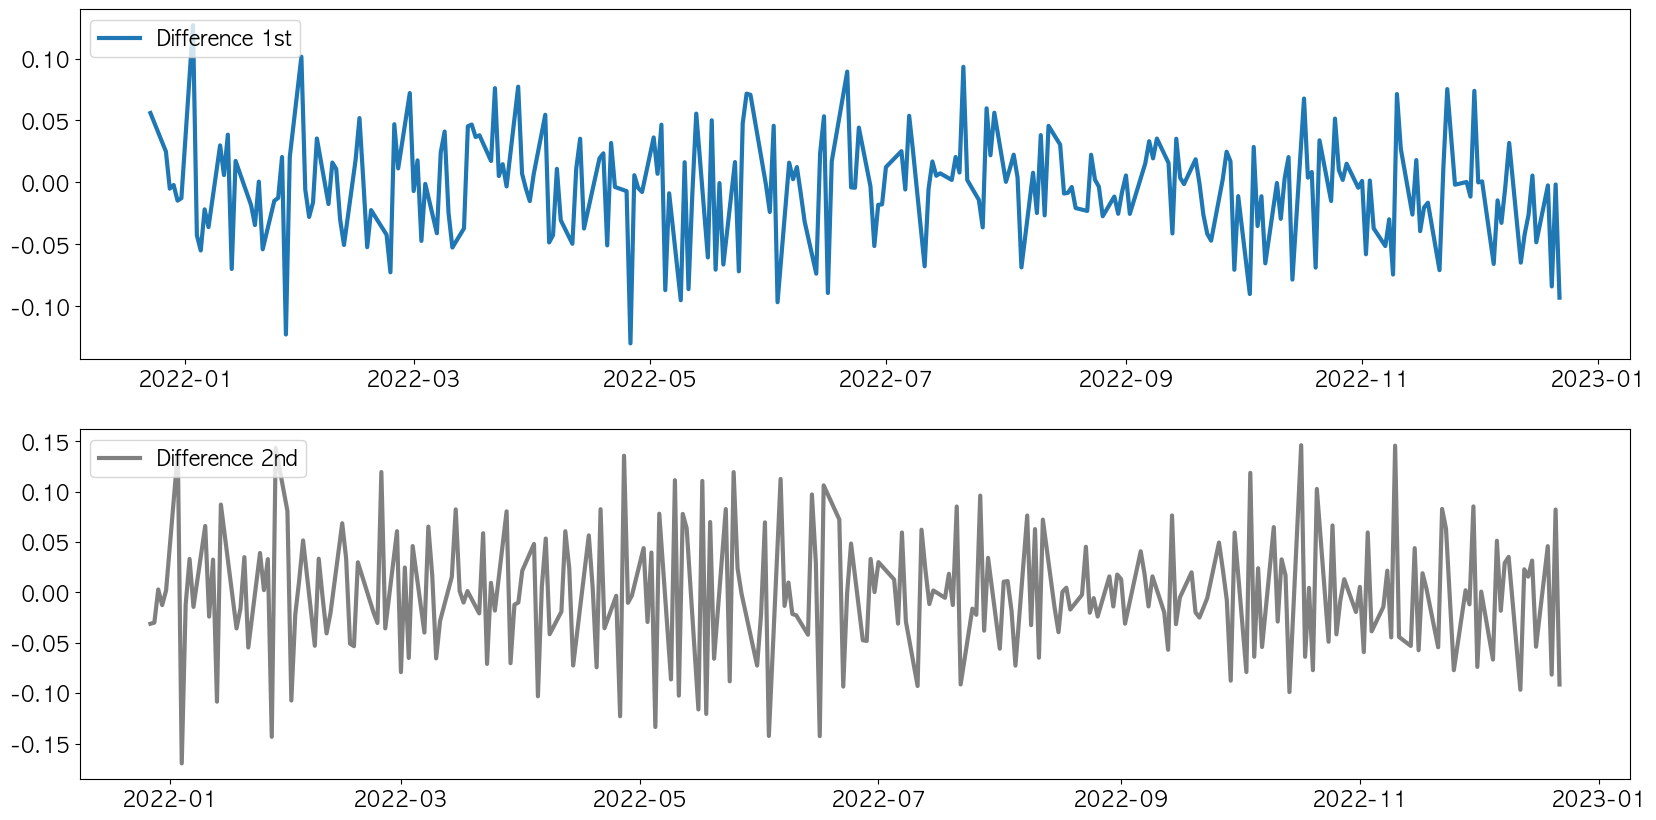

In [12]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_1)
print()
diff_2 = diff_1.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_2)

plt.figure(figsize = (20, 10))
# 1차 차분 구하기
plt.subplot(211)
plt.plot(diff_1, label='Difference 1st', c='tab:blue', linewidth=3)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 2차 차분 구하기
plt.subplot(212)
plt.plot(diff_2, label='Difference 2nd', c='grey', linewidth=3)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## (6) ARIMA 모델 훈련과 테스트

#### 1) Build ARIMA Model

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1, 2, 1))
fitted_m = model.fit() 
print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 396.417
Date:                Fri, 23 Dec 2022   AIC                           -786.835
Time:                        22:44:06   BIC                           -776.586
Sample:                             0   HQIC                          -782.698
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0807      0.078     -1.040      0.298      -0.233       0.071
ma.L1         -0.9997      0.783     -1.276      0.202      -2.535       0.536
sigma2         0.0017      0.001      1.282      0.2

/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### 2) ARIMA Model Test and Plotting

/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


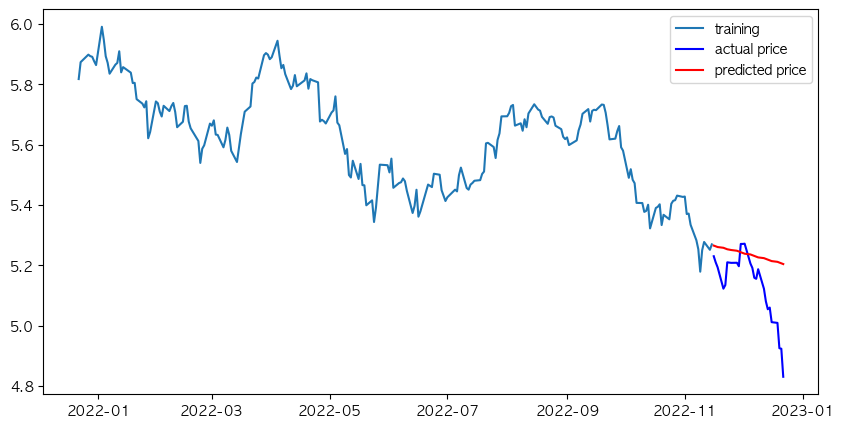

In [14]:
# Forecast
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plotting
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

#### 3) 시계열 예측 지표 (MSE, MAE, RMSE, MAPE)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  546.2496991834809
MAE:  18.595049658442882
RMSE:  23.371985349633455
MAPE: 12.04%


# 3. Project_02_NVIDIA

## (1) 시계열 데이터 준비

In [16]:
df = pd.read_csv('NVDA.csv', index_col='Date', parse_dates=True)
ts = df['Close']
ts

Date
2021-12-22    294.000000
2021-12-23    296.399994
2021-12-27    309.450012
2021-12-28    303.220001
2021-12-29    300.010010
                 ...    
2022-12-16    165.710007
2022-12-19    162.539993
2022-12-20    160.850006
2022-12-21    165.009995
2022-12-22    153.389999
Name: Close, Length: 253, dtype: float64

## (2) 데이터 전처리

#### 1) 결측치 처리

In [17]:
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

#### 2) 로그 변환

In [18]:
ts_log = np.log(ts)
ts_log

Date
2021-12-22    5.683580
2021-12-23    5.691710
2021-12-27    5.734797
2021-12-28    5.714459
2021-12-29    5.703816
                ...   
2022-12-16    5.110239
2022-12-19    5.090924
2022-12-20    5.080472
2022-12-21    5.106006
2022-12-22    5.032984
Name: Close, Length: 253, dtype: float64

## (3) 시계열 안정성 분석

#### 정성적 그래프 분석 → 정량적 ADF Test → 시계열 분해 → Residual 안정성 확인

In [19]:
# 원본시계열, 이동평균, 이동표준편차
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()
    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
# Augmented Dickey-Fuller Test (ADF 검정)
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출
    dftest = adfuller(timeseries, autolag='AIC')  
    # adfuller 메서드가 리턴한 결과를 정리하여 출력
    print('Results of Augmented Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

#### 1) 정성적 그래프 분석

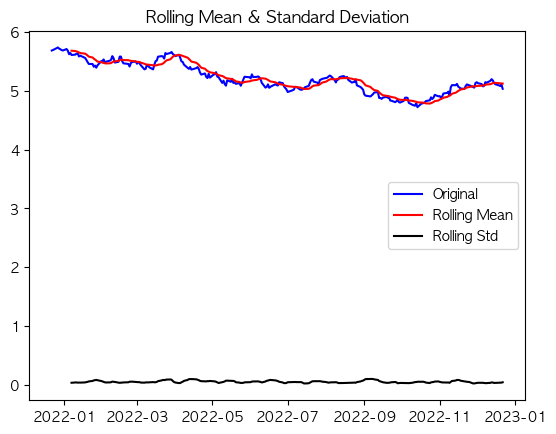

In [20]:
plot_rolling_statistics(ts_log, window=12)

#### 2) 정량적 Augmented Dicky-Fuller Test

In [21]:
augmented_dickey_fuller_test(ts_log)

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.831614
p-value                          0.364883
#Lags Used                       0.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


→ ts_log 시계열이 안정적이지 않다는 귀무가설은 p-value가 0.74에 가깝게 나타남. 따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됨

#### 3) 시계열 분해 (Time Series Decomposition)

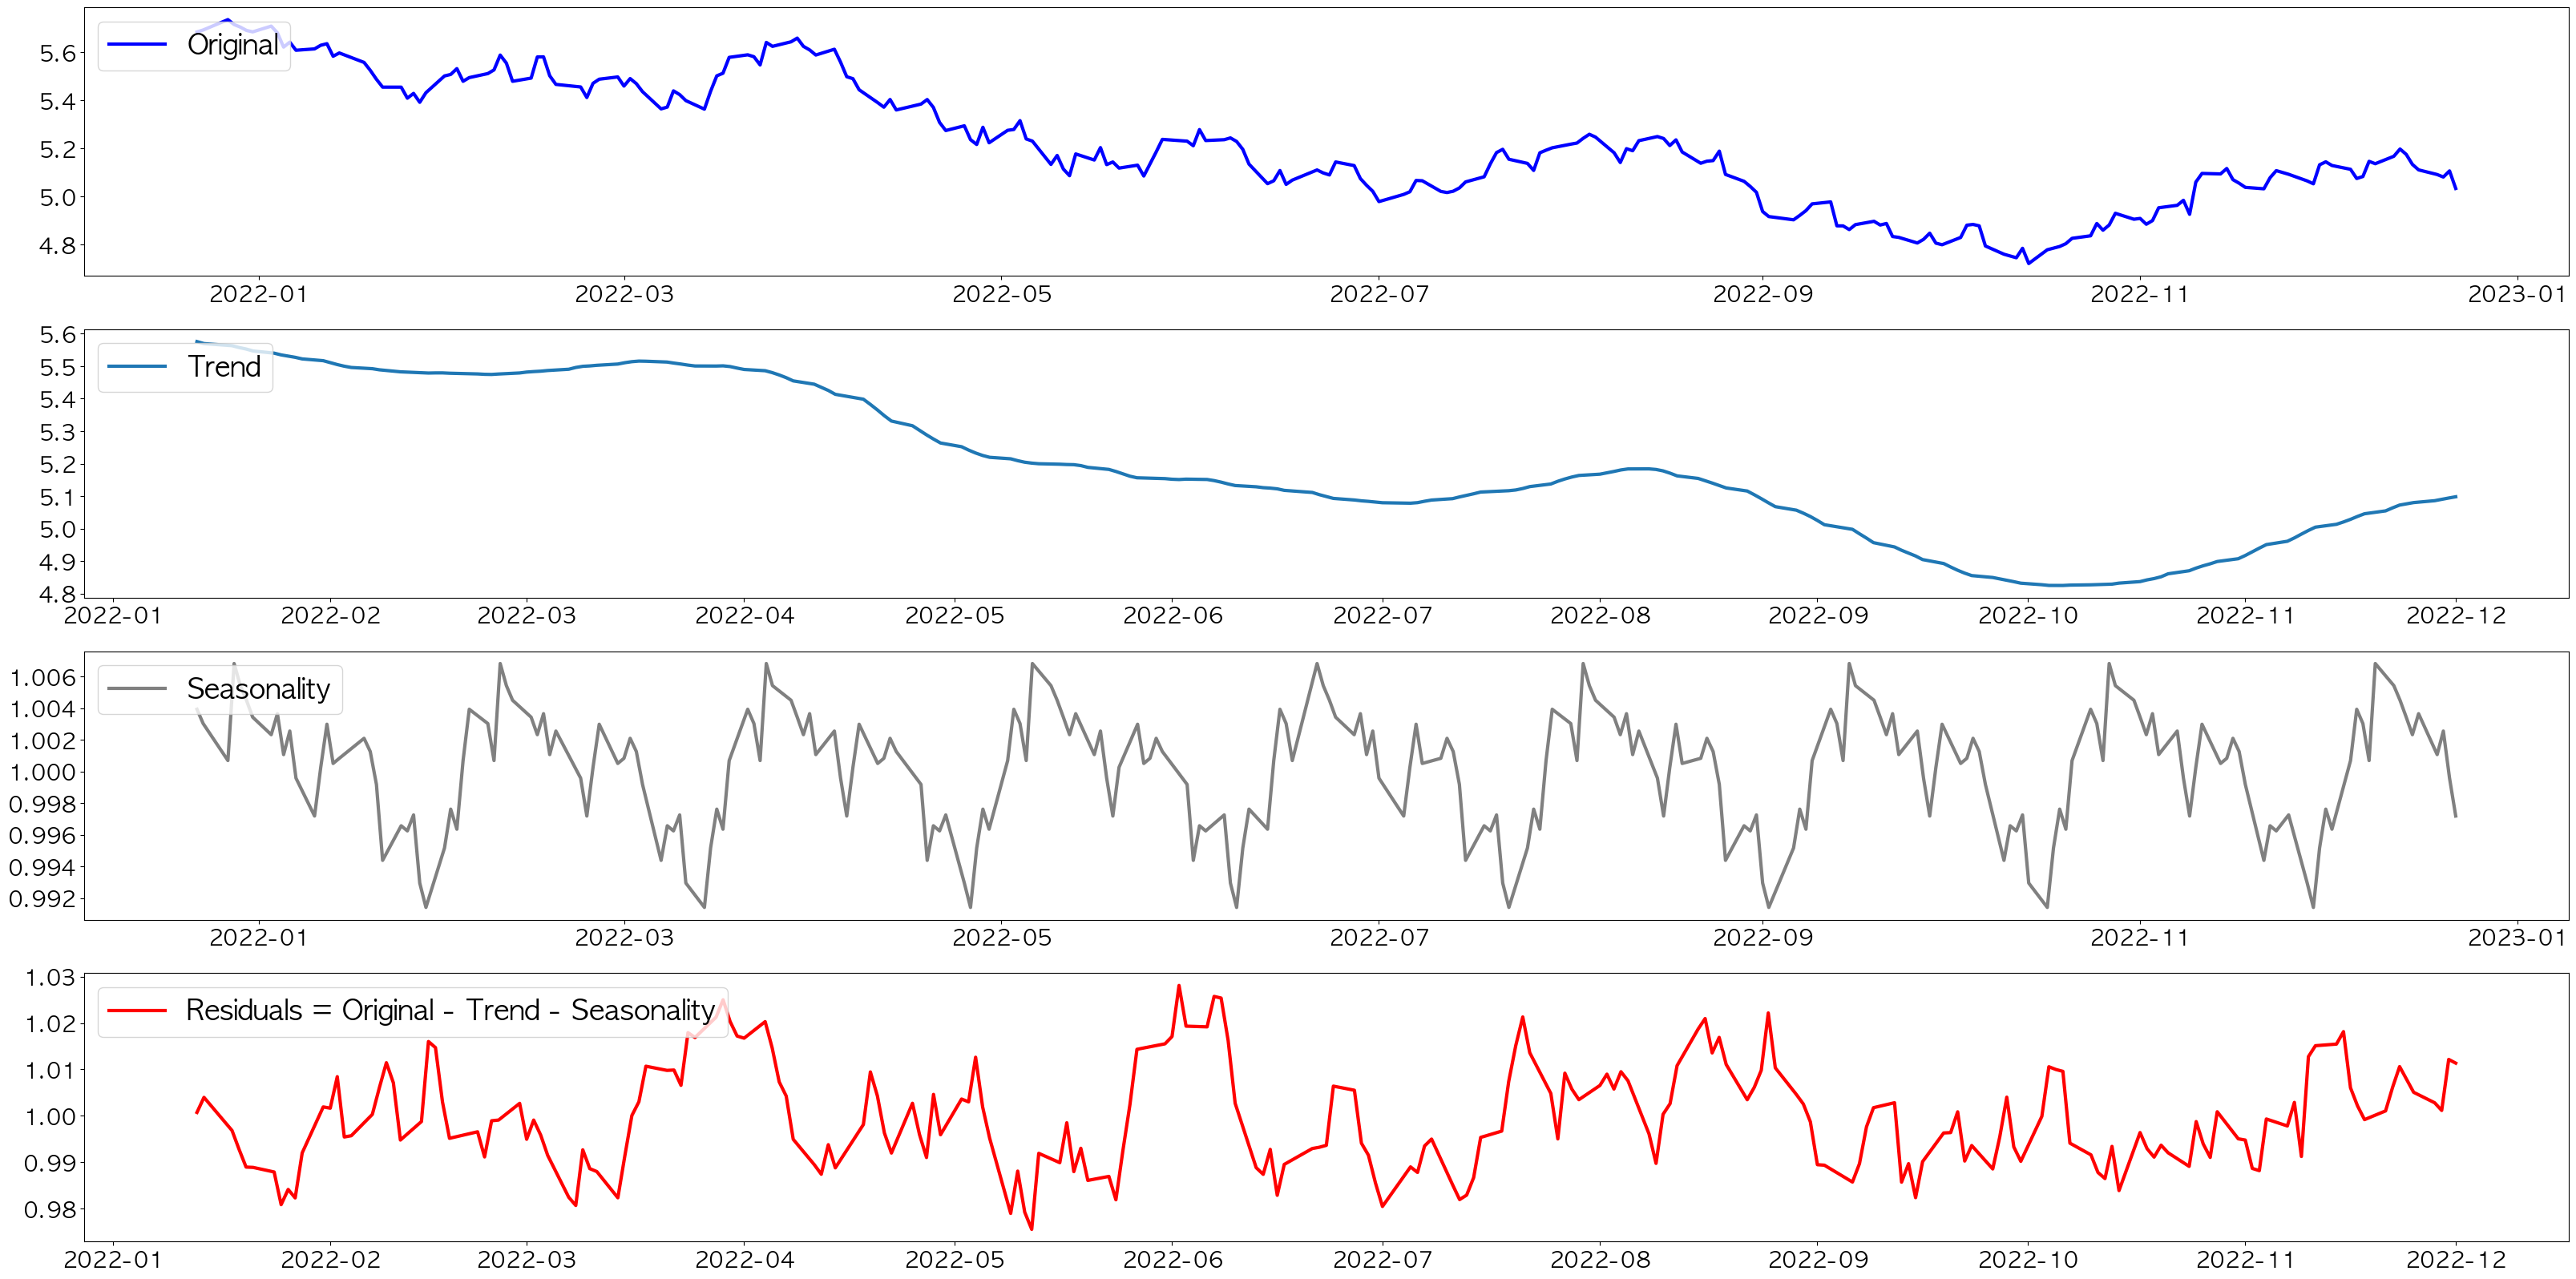

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (40, 20))

plt.subplot(411)
plt.plot(ts_log, label='Original', c='b', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(412)
plt.plot(trend, label='Trend', c='tab:blue', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', c='grey', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(414)
plt.plot(residual, label='Residuals = Original - Trend - Seasonality', c='r', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

#### 4) Residual 안정성 확인

In [23]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -5.046385
p-value                          0.000018
#Lags Used                       0.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


## (4) 학습, 테스트 데이터셋 생성

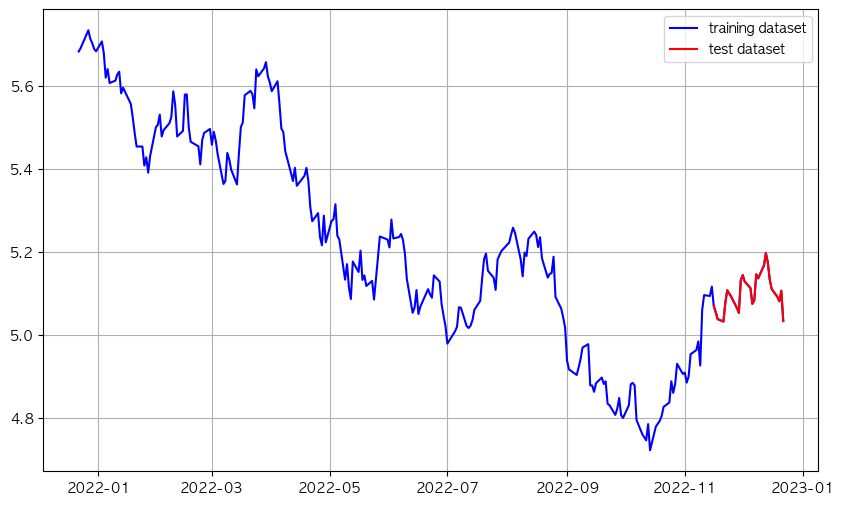

In [24]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='b', label='training dataset')
plt.plot(test_data, c='r', label='test dataset')
plt.legend()
plt.show()

## (5) 적정 ARIMA 모수 찾기

#### 1) ACF, PACF 그리기 → p, q 구하기 

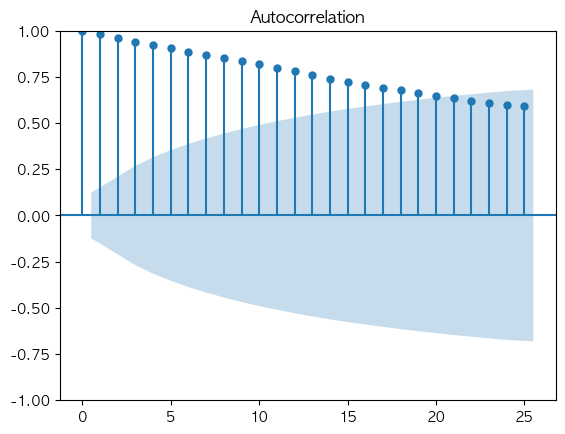

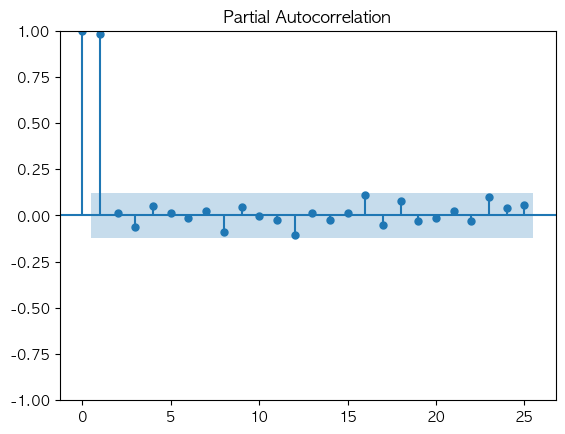

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)  
plot_pacf(ts_log)
plt.show()

#### [NVIDIA ACF, PACF 그래프 해석]

ACF는 점점 작아지고 있으며 PACF는 시차 p이후에 0이 되므로 AR(p) 모델이 적합하다고 볼 수 있다.

ACF 그래프가 점점 작아지고, PACF 그래프는 첫 값으로부터 1개 뒤 이후부터 파란상자 안에 값이 들어가며 그래프가 끊기는 것을 볼 수 있다. 이것으로 볼 때, p=1이 적합한 것 같다. p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문이다. PACF가 0이라는 의미는 현재 데이터와 p시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻이다. 따라서 이 데이터 셋을 사용할 때는 AR(1) 모델을 활용하는 것이 가장 정확도가 높을 것이라고 유추할 수 있다. 

(p=1, q=0)

#### 2) 차분 안정성 확인 → d 구하기 (p-value가 충분히 낮으므로 1차 차분 만으로도 충분하다. (d=1))

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.594067e+01
p-value                        7.546949e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64

Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.472855e+00
p-value                        4.062276e-16
#Lags Used                     9.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64


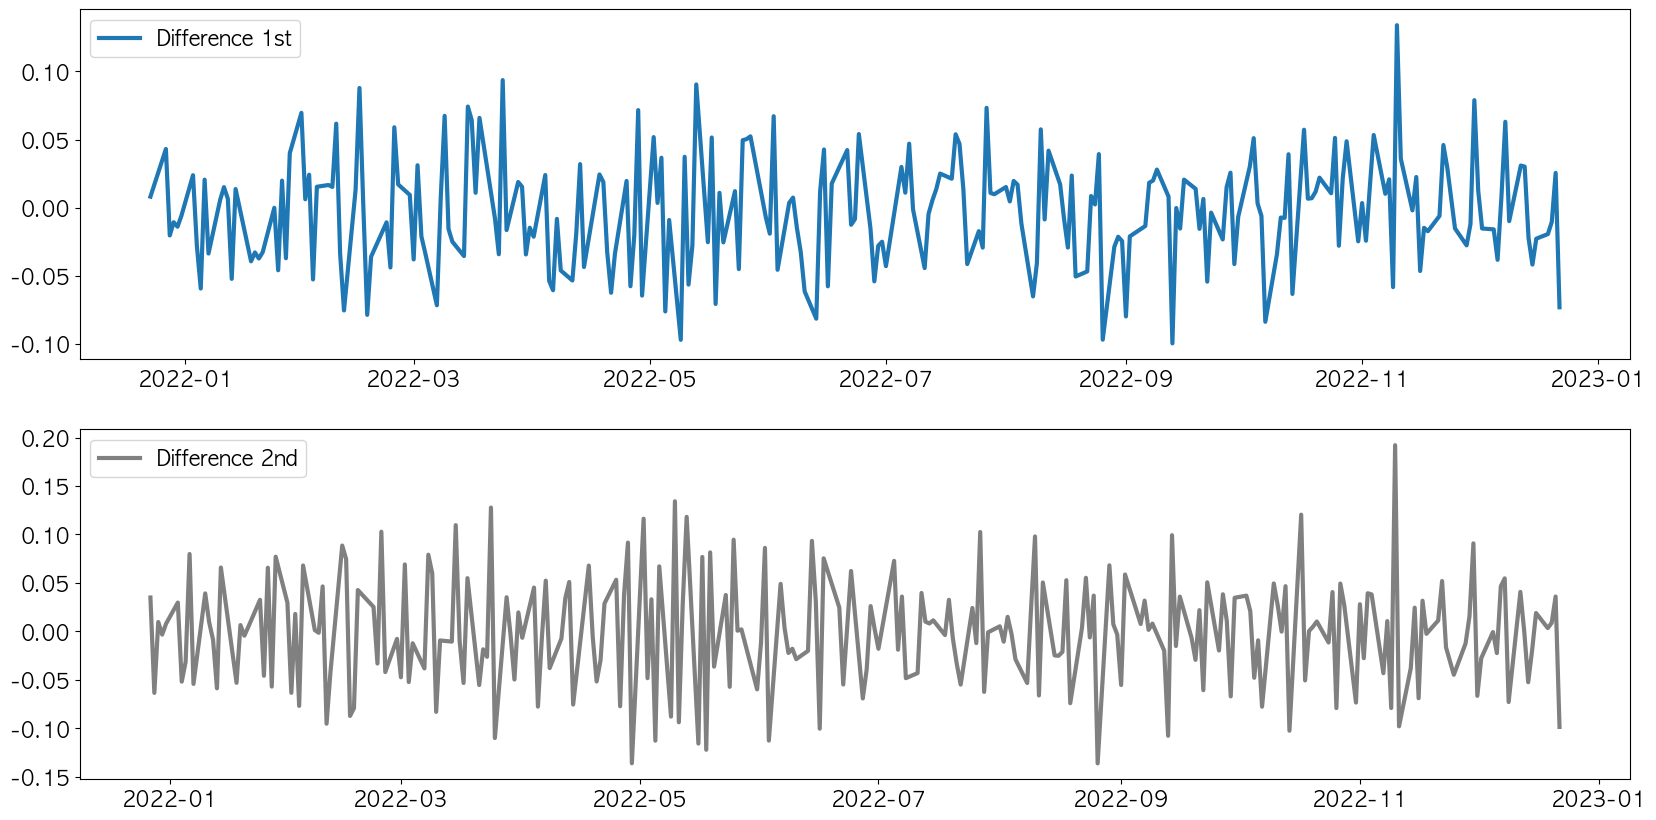

In [26]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_1)
print()
diff_2 = diff_1.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_2)

plt.figure(figsize = (20, 10))
# 1차 차분 구하기
plt.subplot(211)
plt.plot(diff_1, label='Difference 1st', c='tab:blue', linewidth=3)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 2차 차분 구하기
plt.subplot(212)
plt.plot(diff_2, label='Difference 2nd', c='grey', linewidth=3)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## (6) ARIMA 모델 훈련과 테스트

#### 1) Build ARIMA Model

In [27]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit()
print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  227
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 406.441
Date:                Fri, 23 Dec 2022   AIC                           -808.882
Time:                        22:44:07   BIC                           -802.041
Sample:                             0   HQIC                          -806.121
                                - 227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0189      0.073     -0.258      0.796      -0.162       0.124
sigma2         0.0016      0.000     10.248      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   0.00   Jarque-

/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### 2) ARIMA Model Test and Plotting

/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


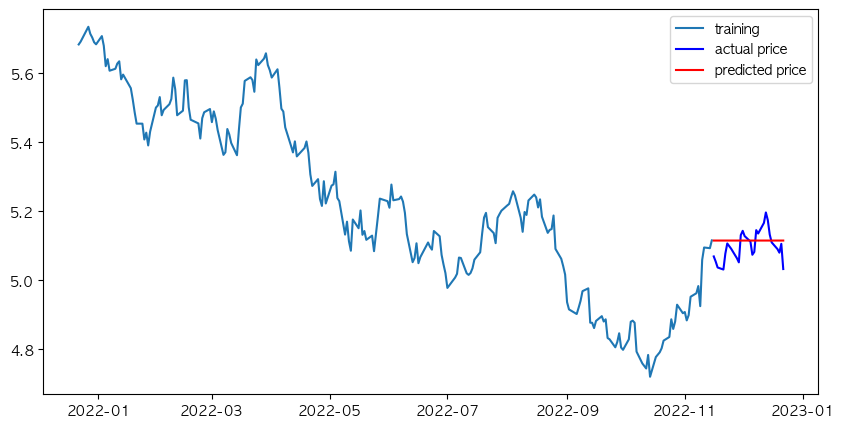

In [28]:
# Forecast
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plotting
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

#### 3) 시계열 예측 지표 (MSE, MAE, RMSE, MAPE)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  56.89222934768987
MAE:  6.360121095853017
RMSE:  7.5426937726312255
MAPE: 3.91%


# 4. Project_03_NAVER

## (1) 시계열 데이터 준비

In [30]:
df = pd.read_csv('NAVER.csv', index_col='Date', parse_dates=True)
ts = df['Close']
ts

Date
2021-12-23    378000.0
2021-12-24    384000.0
2021-12-27    380500.0
2021-12-28    384500.0
2021-12-29    382000.0
                ...   
2022-12-19    183500.0
2022-12-20    180500.0
2022-12-21    180000.0
2022-12-22    184500.0
2022-12-23    178500.0
Name: Close, Length: 246, dtype: float64

## (2) 데이터 전처리

#### 1) 결측치 처리

In [31]:
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

#### 2) 로그 변환

In [32]:
ts_log = np.log(ts)
ts_log

Date
2021-12-23    12.842649
2021-12-24    12.858398
2021-12-27    12.849241
2021-12-28    12.859699
2021-12-29    12.853176
                ...    
2022-12-19    12.119970
2022-12-20    12.103486
2022-12-21    12.100712
2022-12-22    12.125405
2022-12-23    12.092344
Name: Close, Length: 246, dtype: float64

## (3) 시계열 안정성 분석

#### 정성적 그래프 분석 → 정량적 ADF Test → 시계열 분해 → Residual 안정성 확인

In [33]:
# 원본시계열, 이동평균, 이동표준편차
def plot_rolling_statistics(timeseries, window=12) :
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()
    # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
# Augmented Dickey-Fuller Test (ADF 검정)
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_test(timeseries) :
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출
    dftest = adfuller(timeseries, autolag='AIC')  
    # adfuller 메서드가 리턴한 결과를 정리하여 출력
    print('Results of Augmented Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

#### 1) 정성적 그래프 분석

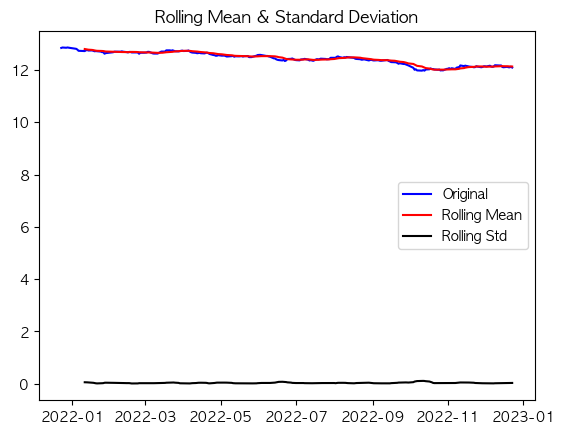

In [34]:
plot_rolling_statistics(ts_log, window=12)

#### 2) 정량적 Augmented Dicky-Fuller Test

In [35]:
augmented_dickey_fuller_test(ts_log)

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.034934
p-value                          0.740311
#Lags Used                       0.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


→ ts_log 시계열이 안정적이지 않다는 귀무가설은 p-value가 0.74에 가깝게 나타남. 따라서 이 귀무가설은 기각되고, 이 시계열은 안정적 시계열이라는 대립가설이 채택됨

#### 3) 시계열 분해 (Time Series Decomposition)

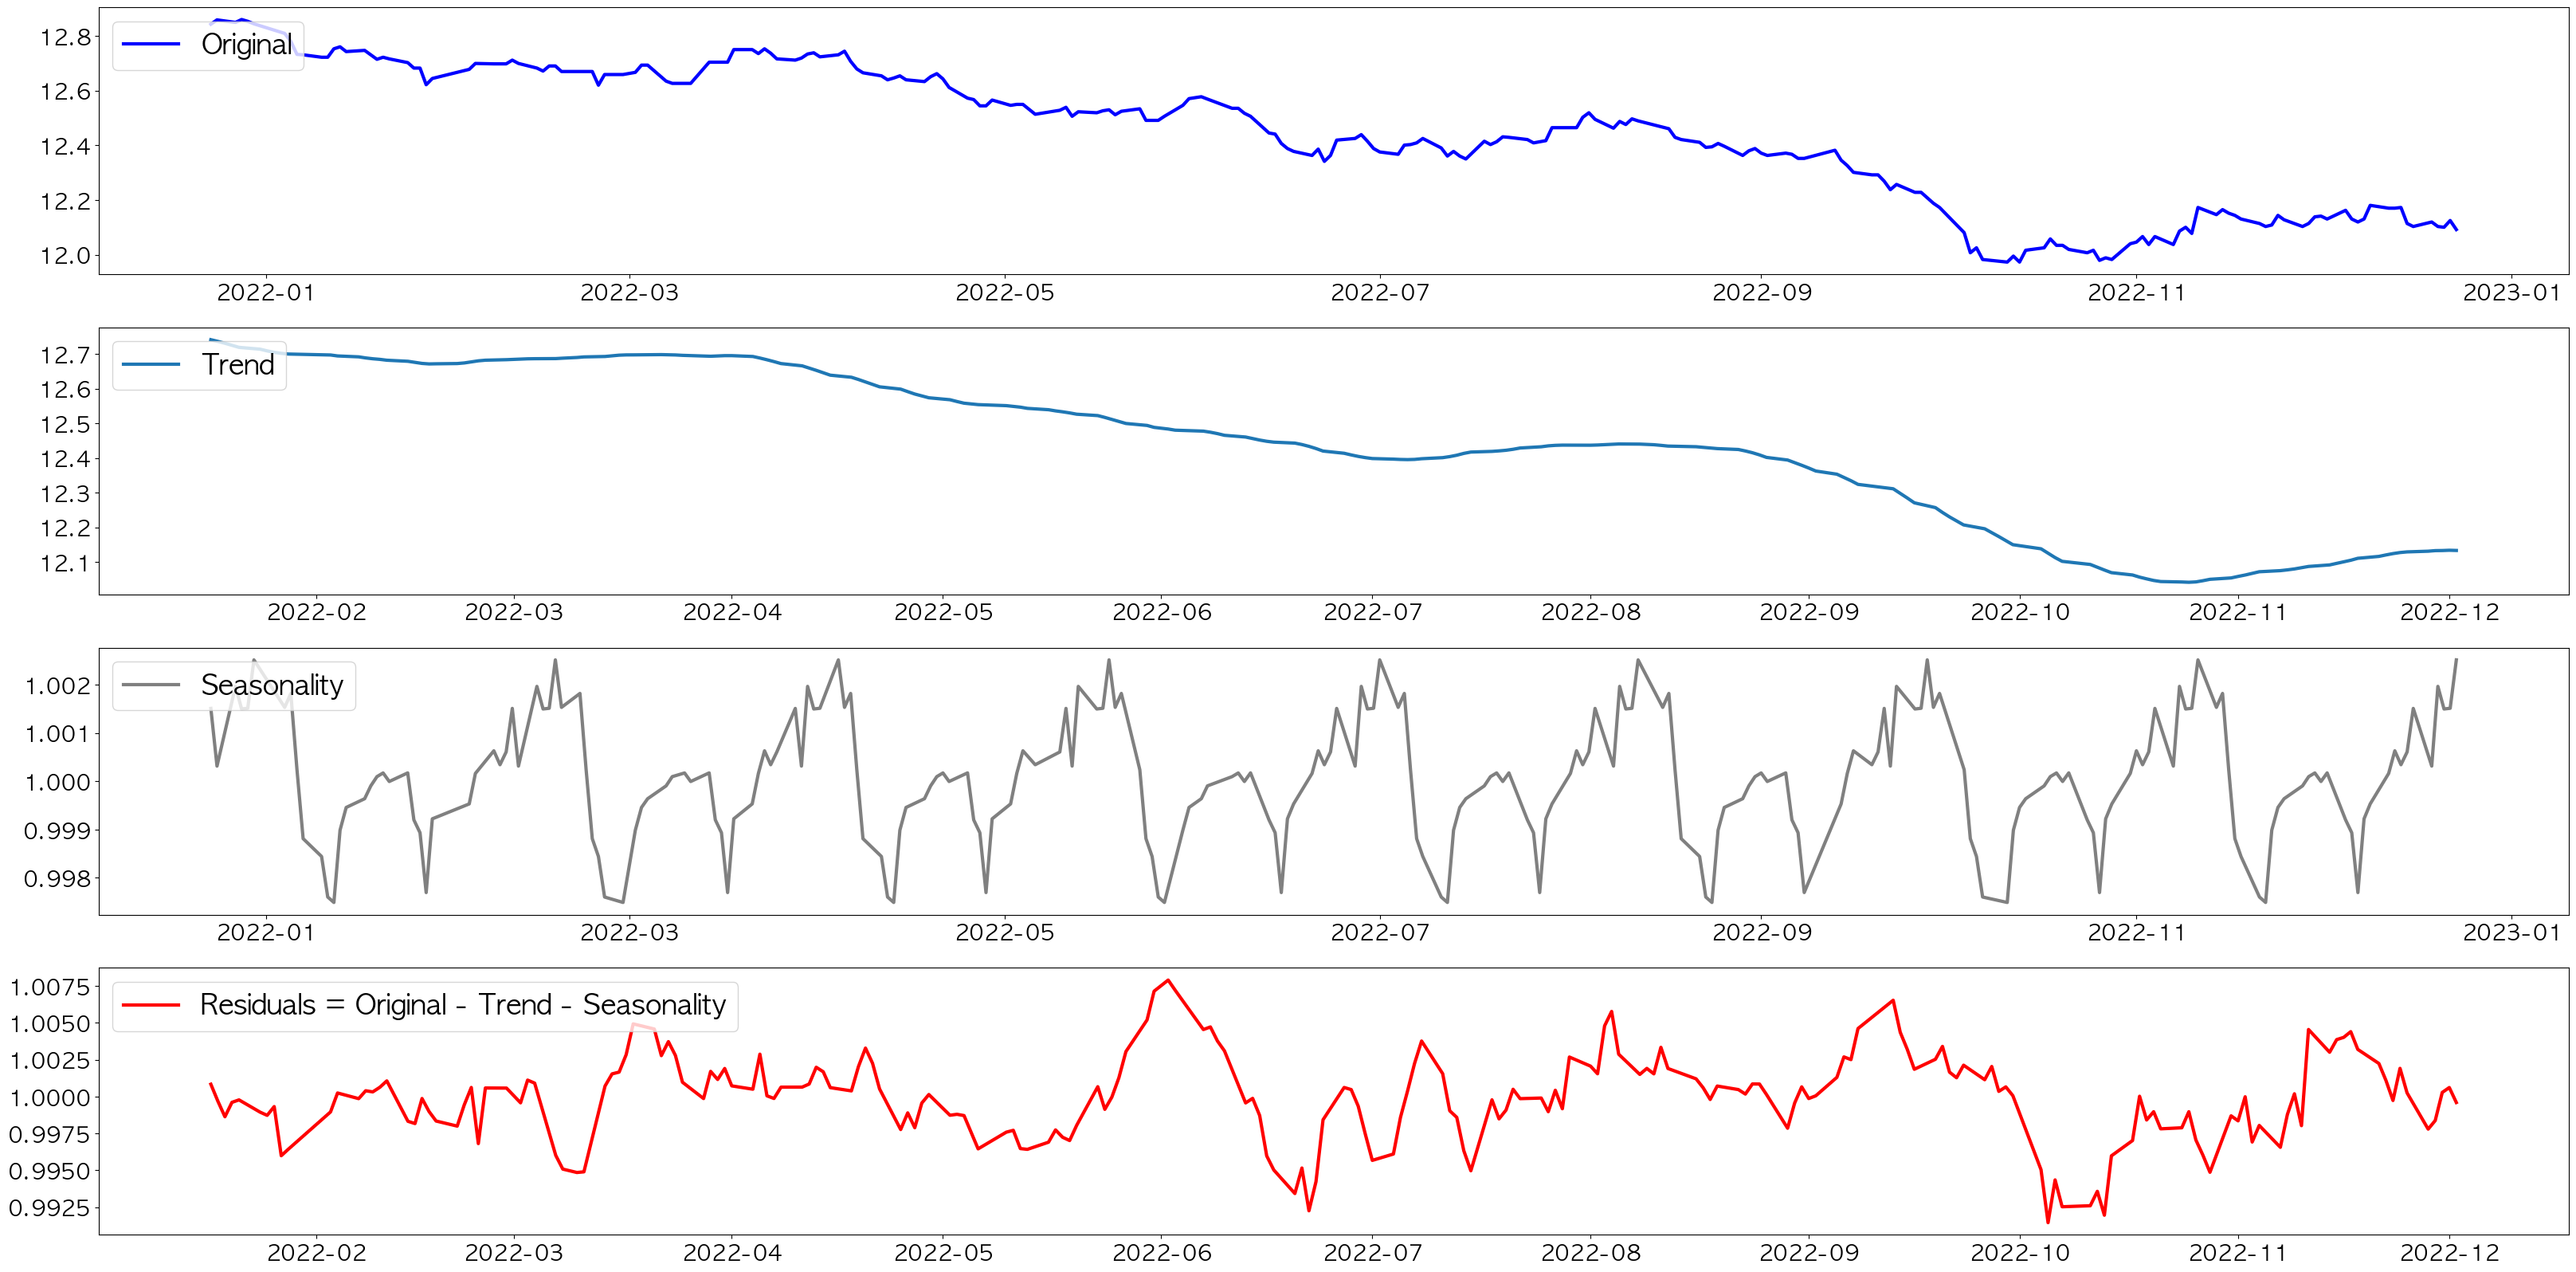

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (40, 20))

plt.subplot(411)
plt.plot(ts_log, label='Original', c='b', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(412)
plt.plot(trend, label='Trend', c='tab:blue', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', c='grey', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(414)
plt.plot(residual, label='Residuals = Original - Trend - Seasonality', c='r', linewidth=3)
plt.legend(loc='upper left', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

#### 4) Residual 안정성 확인

In [37]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.510233
p-value                          0.007728
#Lags Used                      14.000000
Number of Observations Used    201.000000
Critical Value (1%)             -3.463309
Critical Value (5%)             -2.876029
Critical Value (10%)            -2.574493
dtype: float64


## (4) 학습, 테스트 데이터셋 생성

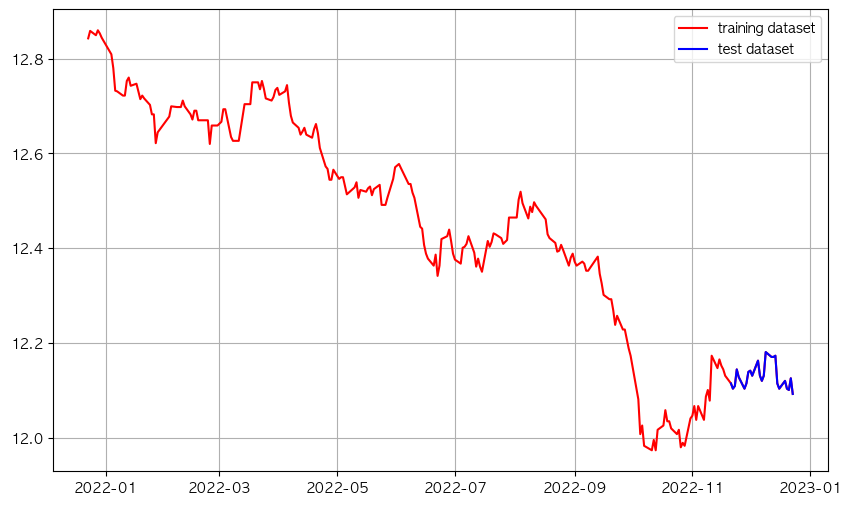

In [38]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()
plt.show()

## (5) 적정 ARIMA 모수 찾기

#### 1) ACF, PACF 그리기 → p, q 구하기

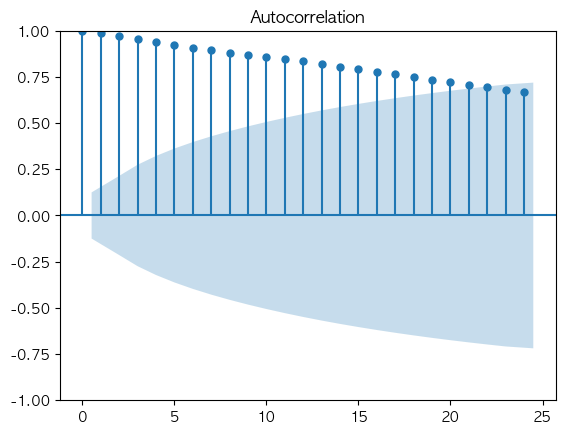

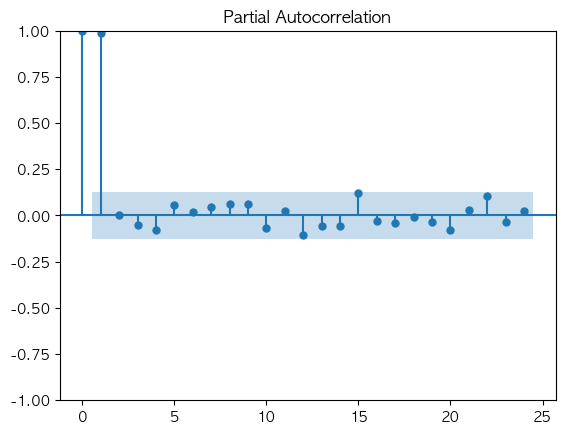

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   
plot_pacf(ts_log) 
plt.show()

#### [NAVER ACF, PACF 그래프 해석 ]

위의 표에 따르면, ACF는 점점 작아지고 있으며 PACF는 시차 p이후에 0이 되므로 AR(p) 모델이 적합하다고 볼 수 있다.

ACF 그래프가 점점 작아지고, PACF 그래프는 첫 값으로부터 1개 뒤 이후부터 파란상자 안에 값이 들어가며 그래프가 끊기는 것을 볼 수 있다. 이것으로 볼 때, p=1이 적합한 것 같다. p가 2 이상인 구간에서 PACF는 거의 0에 가까워지고 있기 때문이다. PACF가 0이라는 의미는 현재 데이터와 p시점 떨어진 이전의 데이터는 상관도가 0, 즉 아무 상관 없는 데이터이기 때문에 고려할 필요가 없다는 뜻이다. 따라서 이 데이터 셋을 사용할 때는 AR(1) 모델을 활용하는 것이 가장 정확도가 높을 것이라고 유추할 수 있다. 

(p=1, q=0)

#### 2) 차분 안정성 확인 → d 구하기 (p-value가 충분히 낮으므로 1차 차분 만으로도 충분하다. (d=1))

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.571887e+01
p-value                        1.331471e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64

Results of Augmented Dickey-Fuller Test:
Test Statistic                -8.433844e+00
p-value                        1.839257e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


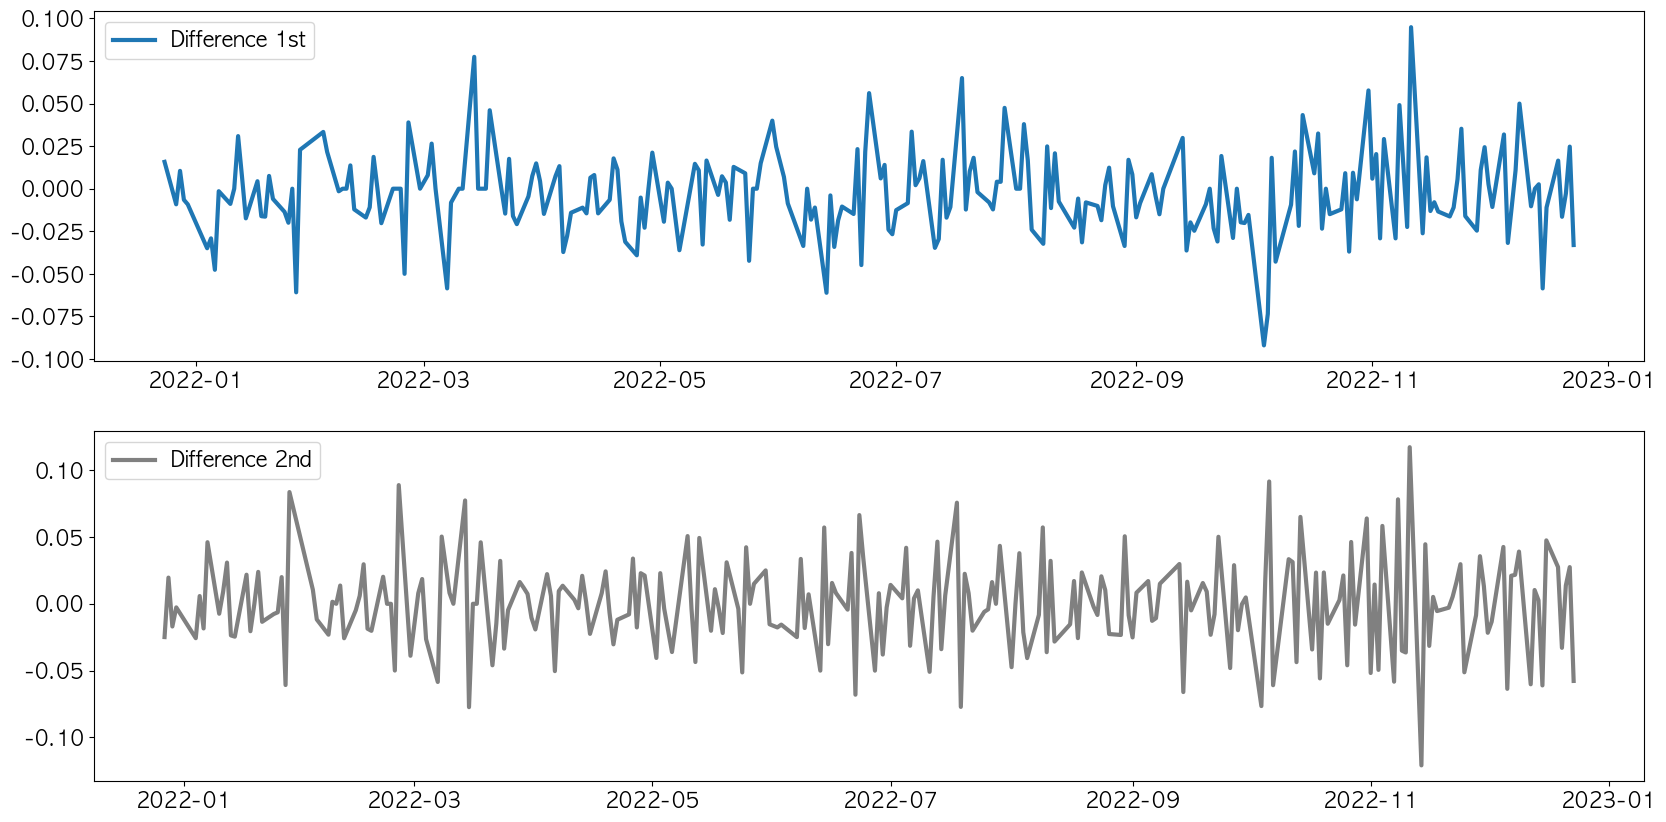

In [40]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_1)
print()
diff_2 = diff_1.diff(periods=1).iloc[1:]
augmented_dickey_fuller_test(diff_2)

plt.figure(figsize = (20, 10))
# 1차 차분 구하기
plt.subplot(211)
plt.plot(diff_1, label='Difference 1st', c='tab:blue', linewidth=3)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 2차 차분 구하기
plt.subplot(212)
plt.plot(diff_2, label='Difference 2nd', c='grey', linewidth=3)
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## (6) ARIMA 모델 훈련과 테스트

#### 1) Build ARIMA Model

In [41]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1, 1, 0))
fitted_m = model.fit() 
print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 502.296
Date:                Fri, 23 Dec 2022   AIC                          -1000.592
Time:                        22:44:08   BIC                           -993.804
Sample:                             0   HQIC                          -997.851
                                - 221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0148      0.062      0.240      0.810      -0.106       0.135
sigma2         0.0006   4.28e-05     14.230      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.08   Jarque-

/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### 2) ARIMA Model Test and Plotting

/Users/jwmoon/miniforge3/envs/tf25/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


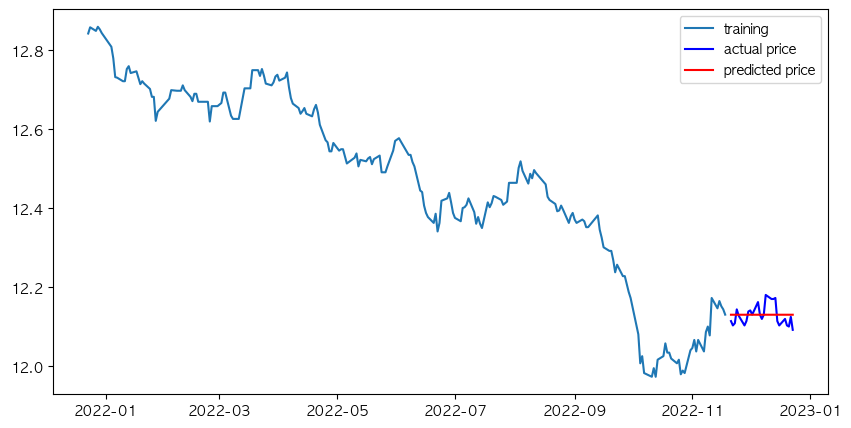

In [42]:
# Forecast
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plotting
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

#### 3) 시계열 예측 지표 (MSE, MAE, RMSE, MAPE)

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  21852140.685798828
MAE:  3815.5494672693917
RMSE:  4674.627331221049
MAPE: 2.05%


# 5. 결론

___________________________________________________________________________________________________________________

### <전체 프로세스 구성>

(1) 시계열 데이터 준비

(2) 데이터 전처리
- 1) 결측치 처리 
- 2) 로그 변환

(3) 시계열 안정성 분석
- 1) 정성적 그래프 분석
- 2) 정량적 ADF Test
- 3) 시계열 분석
- 4) Residual 안정성 확인)

(4) 학습, 테스트 데이터셋 생성

(5) 적정 ARIMA 모수 찾기
- 1) ACF, PACF 그리기
- 2) 그래프 해석(p, q 구하기)
- 3) 차분 안정성 확인 (d 구하기)

(6) ARIMA 모델 훈련과 테스트
- 1) Build ARIMA Model 
- 2) ARIMA Model Test and Plotting
- 3) 시계열 예측 지표(MSE, MAE, RMSE, MAPE)

위의 과정을 Tesla, Nvidia, Naver 세 개 회사의 주가 분석에 적용하였다.
___________________________________________________________________________________________________________________

#### [Tesla]

- (1) ARIMA(1, 2, 0)이 최적으로 분석되었으나, MAPE은 18.79%가 도출되었다.
- (2) ARIMA(1, 2, 1)을 적용해 본 결과, MAPE은 12.04%로 6.75%가 감소하였다.


- MSE:  546.2496991834809
- MAE:  18.595049658442882
- RMSE:  23.371985349633455
- MAPE: 12.04%
___________________________________________________________________________________________________________________
#### [Nvidia]

ARIMA(1, 1, 0)이 최적으로 분석되었다.

- MSE:  56.89222934768987
- MAE:  6.360121095853017
- RMSE:  7.5426937726312255
- MAPE: 3.91%
___________________________________________________________________________________________________________________

#### [Naver]

ARIMA(1, 1, 0)이 최적으로 분석되었다.

- MSE: 21852140.685798828
- MAE:  3815.5494672693917
- RMSE:  4674.627331221049
- MAPE: 2.05%
___________________________________________________________________________________________________________________

### cf.) MSE, MAE, RMSE, MAPE

- 1) MSE (Mean Squared Error)
      
      오차(error) 제곱의 평균. 오차란 알고리즘이 예측한 값과 실제 정답과의 차이를 의미하며 알고리즘이 정답을 잘 맞출수록 MSE 값은 작음

- 2) MAE (Mean Absolute Error)

      실제 정답 값과 예측 값의 차이를 절댓값으로 변환한 뒤 합산하여 평균을 구함. 특이값이 많은 경우에 주로 사용되며 값이 낮을수록 좋음


- 3) RMSE (Root Mean Square Error)

      추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도


- 4) MAPE (Mean Absolute Percentage Error)

      MAPE는 실제값과 예측값 사이의 차이를 실제값으로 나눠줌으로써 오차가 실제값에서 차지하는 상대적인 비율을 산출함. 그리고 해당 값을 절대값 취한 후 평균을 구함
      
[3] https://google.com
___________________________________________________________________________________________________________________

# 6. References

[1] https://rfriend.tistory.com/264

[2] https://happy-chipmunk.tistory.com/96

[3] https://google.com

[4] https://lms.aiffel.io/course/382/node/511